In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

In [2]:
def compute_benefits(filename="file.csv"):
    data = pd.read_csv(filename)
    
    if ("HD1" not in data.columns):
        return "Mandatory field HD1 is missing!"
    if ("AI" not in data.columns):
        return "Mandatory field AI is missing!"
    if ("FHD" not in data.columns):
        return "Mandatory field FHD is missing!"
    
    if "Type_AI" not in data.columns:
        data["Type_AI"] = ""
        
    if "Study" not in data.columns:
        data["Study"] = ""
        
    if "Complexity" not in data.columns:
        data["Complexity"] = ""
        
    if "Type_H" not in data.columns:
        data["Type_H"] = ""
        
    if ("id" not in data.columns):
        data["id"] = ""
        
    grouped = data.groupby(["id","Type_AI", "Type_H", "Study"]).mean().reset_index()
    
    for v in grouped["Type_AI"].unique():
        for s in grouped["Study"].unique():
            temp = grouped[(grouped["Type_AI"] == v) & (grouped["Study"] == s)]
            baseline = temp["HD1"]
            difference = temp["FHD"] - temp["HD1"]
            benefit_diagram(baseline, difference, temp["Type_H"], v + " (" + s + ")")

In [3]:
#baseline is a baseline accuracy (e.g., accuracy without AI)
#difference is the difference between two accuracies (e.g., accuracy with AI - accuracy without AI)
def benefit_diagram(baseline, difference, groups, ai_group=""):
    plt.figure(figsize=(10,10))
    sns.scatterplot(x=baseline,
                    y=difference, hue=groups, palette="colorblind")
    
    plt.title(ai_group)

    vals = np.array([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
    plt.fill_between(vals, 1 - vals, alpha=0.3, color="blue" )
    plt.fill_between(vals, - vals, alpha=0.3, color="red" )

    plt.axhline(np.mean(difference), color="black")
    plt.axhline(np.mean(difference) + 1.96*np.std(difference)/np.sqrt(len(difference)), color="black", alpha=0.25)
    plt.axhline(np.mean(difference) - 1.96*np.std(difference)/np.sqrt(len(difference)), color="black", alpha=0.25)
    plt.xlabel("HD1")
    plt.ylabel("FHD - HD1")
    plt.xlim(0,1)
    plt.ylim(-1,1)
    plt.legend(title="User Group")
    plt.savefig("benefit_" + ai_group + ".png", dpi=300, bbox_inches="tight")


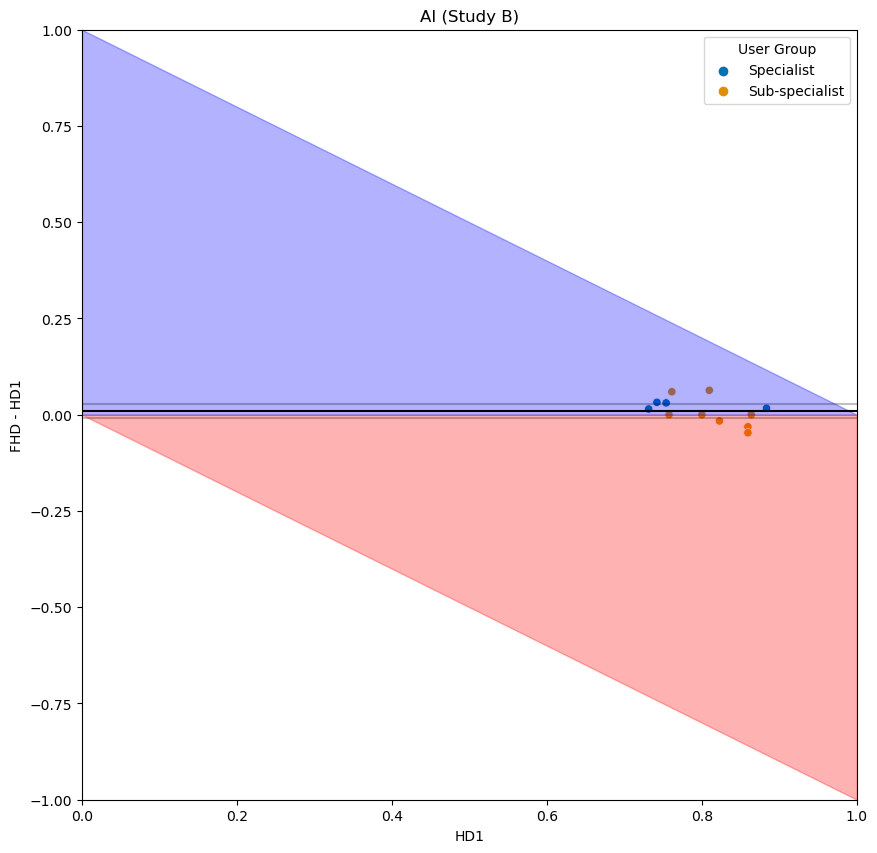

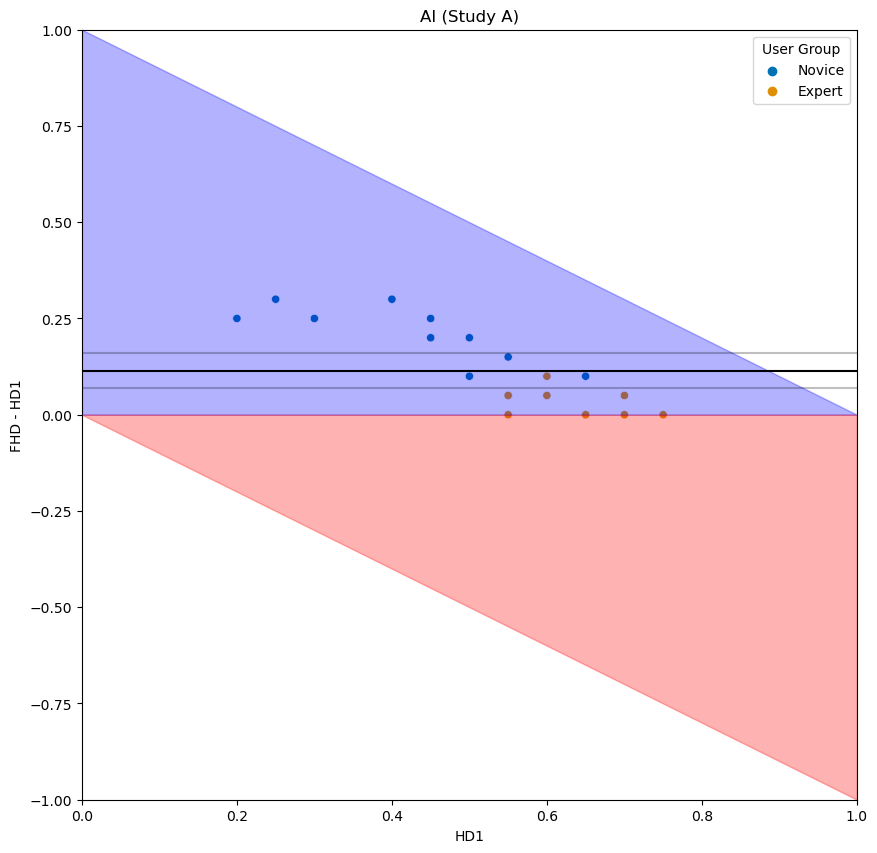

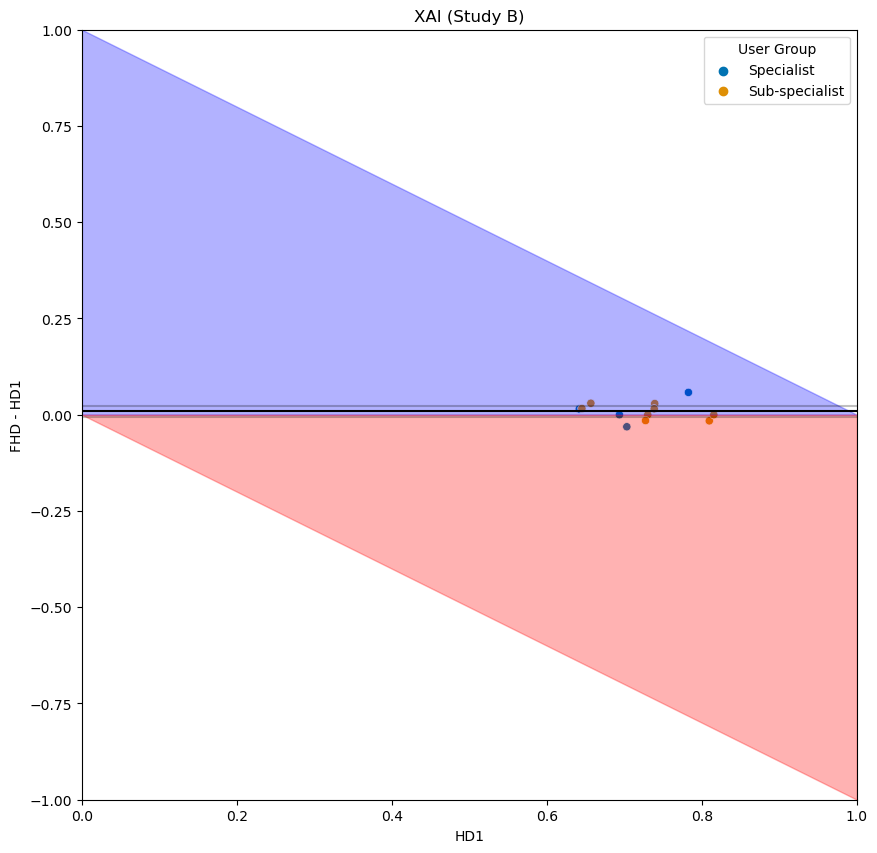

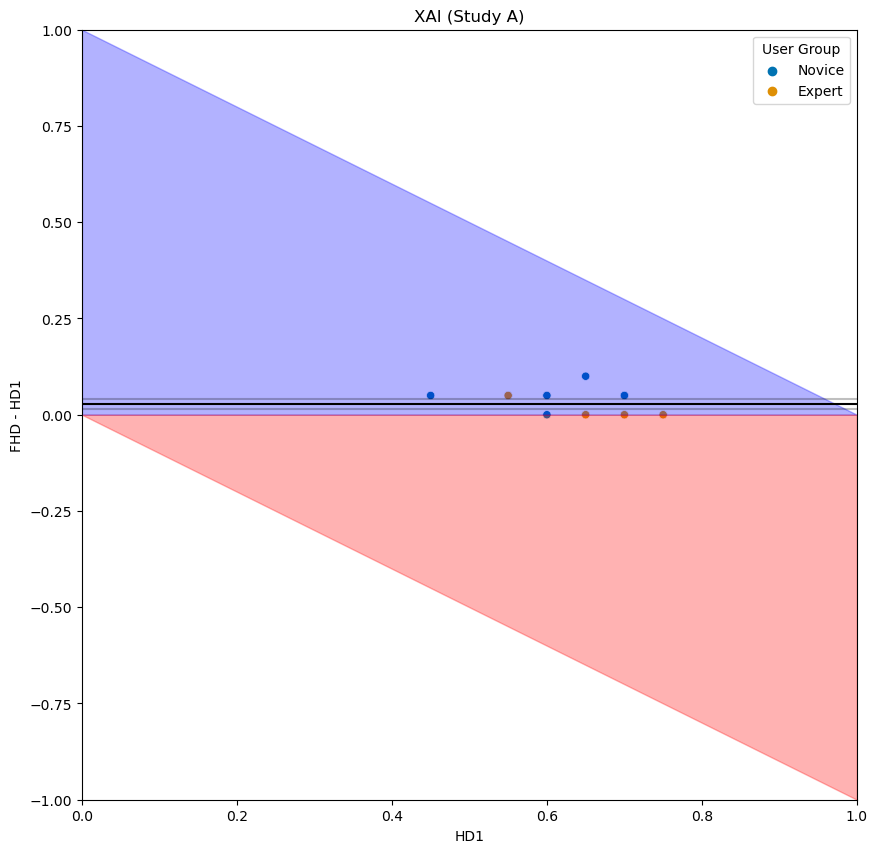

In [4]:
filename = "../data/sample_data.csv"
compute_benefits(filename)